In [69]:
import networkx as nx
import random
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 

In [70]:
# import empirical netwrok
em_mat=pd.read_csv('C:/Users/wyw25/thesis/MAT_experiment/2018-01-23.csv', header=None)

In [71]:
# load the nestedness of the empirical netwrok
N_list=[]
Q_list=[]
I_list=[]
I_MQ_list=[]

for i in range(200):
    nestedness=pd.read_csv("C:/Users/wyw25/thesis/2018-01-23/"+str(i)+"/data_structures_NQI_results2018-01-23.csv")
    
    N=nestedness['N'].values[0]
    Q=nestedness['Q'].values[0]
    I=nestedness['I'].values[0]
    I_MQ=nestedness['I_MQ'].values[0]
    
    
    N_list.append(N)
    Q_list.append(Q)
    I_list.append(I)
    I_MQ_list.append(I_MQ)


In [72]:
N_observation=np.mean(N_list)
Q_observation=np.mean(Q_list)
I_observation=np.mean(I_list)
I_MQ_observation=np.mean(I_MQ_list)


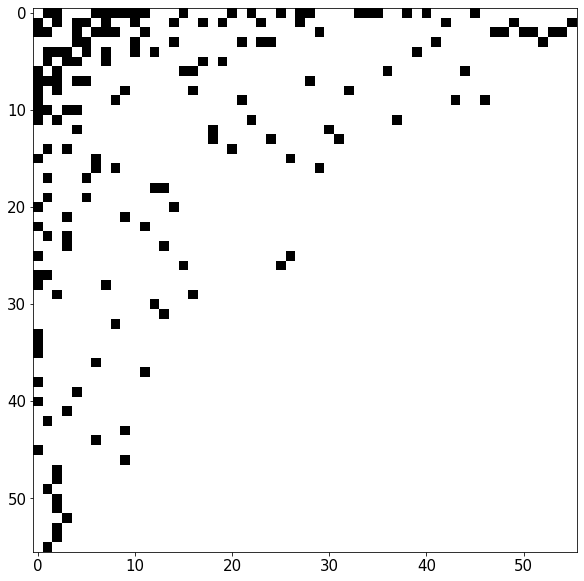

In [73]:
G_empirical=nx.from_numpy_array(np.array(em_mat))
degreeofday=dict(G_empirical.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G_empirical,nodenewlist)

In [74]:
# import the simulated network
# load the dict of dataframes
with open('simulation_50/simulation_50_20_2.pkl', 'rb') as fp:
    simutable = pickle.load(fp)


In [75]:
# import the computed Q, nodf, IBNestedness of all simulated point

with open('parameter_50/I.pkl', 'rb') as fp:
    I = pickle.load(fp)
    
with open('parameter_50/Q.pkl', 'rb') as fp:
    Q = pickle.load(fp)
    
with open('parameter_50/N.pkl', 'rb') as fp:
    N = pickle.load(fp)
    
with open('parameter_50/I_MQ.pkl', 'rb') as fp:
    I_MQ = pickle.load(fp)


In [44]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_array(G, dtype=bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
  #  fig = pyplot.figure(figsize=(10, 10)) # in inches
  #  pyplot.imshow(adjacency_matrix,
  #                cmap="Greys",
  #                interpolation="none")
    fig = plt.figure(figsize=(10, 10))  # in inches
    plt.imshow(adjacency_matrix, cmap="Greys", interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth=1))
            current_idx += len(module)
    plt.savefig('figure3_2.pdf')
    plt.show()

In [76]:
#combination1

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
    
   
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

In [16]:
# combination2

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
  #  average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
        
    
    return Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
   # average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return Q_index,N_index,I_index

In [17]:
# combination3

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
    
    
    
    return average_degree,clustering_coefficient

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient

In [77]:
def likelihood(params, real_data, simulated_data):
    """
    Calculate the likelihood of observing the real data given the parameters.

    Parameters:
    - params: array-like, the parameters (pL_s, pL_d, pNL_nl)
    - real_data: array-like, the real network properties (average_degree, average_path_length, clustering_coefficient)
    - simulated_data: array-like, the simulated network properties for the given parameters
    - uncertainties: array-like, uncertainties for each network property

    Returns:
    - likelihood_value: float, the likelihood value
    """
    # Calculate the squared differences between simulated and real data
    squared_diff = ((simulated_data - real_data) / np.std(simulated_data))**2

    # Calculate the log-likelihood (assuming normal distribution)
    log_likelihood = -0.5 * np.sum(squared_diff)
    likelihood=np.exp(log_likelihood)

    return likelihood



In [78]:
parameter_LIST = {}
for i in tqdm(range(1,len(simutable)+1)):
    parameter_LIST[i] = {}
    for j in range(len(simutable[1])):
        parameter_LIST[i][j] = {}
        for k in range(len(simutable[1][1])):
            simumat=simutable[i][j][k]
            G_simu=nx.from_numpy_array(np.array(simutable[i][j][k]))
            parameter_simu=np.array(Compute_properties(G_simu,i,j,k,I,Q,N,I_MQ))
            parameter_LIST[i][j][k]=parameter_simu

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:34<00:00,  1.74s/it]


In [79]:
# Example usage:
# Replace the following with your actual data and uncertainties
real_data =np.array(Compute_properties_OBSERVATION(G_empirical,N_observation,I_observation,Q_observation,I_MQ_observation))
#uncertainties = np.array([0.2, 0.2, 0.2])
likelihoodlist=[]

compare=0
i_max=0
j_max=0
k_max=0

for i in range(1,len(simutable)):
    for j in range(len(simutable[1])):
        for k in range(len(simutable[1][1])):           
            simulated_data = parameter_LIST[i][j][k]

            # Replace with the actual parameter values you want to evaluate
            parameters_to_evaluate = np.array([0.5,0.5, 0.5])

            # Calculate the likelihood for the given parameters
            likelihood_value = likelihood(parameters_to_evaluate, real_data, simulated_data)
            
            if np.isnan(likelihood_value):
                likelihood_value=0
            if likelihood_value>compare:
                compare=likelihood_value
                i_max=i
                j_max=j
                k_max=k
            
            likelihoodlist.append(likelihood_value)

            print("Likelihood:", likelihood_value)

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.517675910839906e-63
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 7.344452374136503e-130
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.841240271399892e-306
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.1177442126928608e-167
Likelihood: 2.4632537410267113e-302
Likelihood: 6.403823077680235e-189
Likelihood: 0.0
Likelihood: 5.100840728765945e-301
Likelihood: 0.0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.7378918944969e-55
Likelihood: 0.0
Likelihood: 6.644586850601978e-176
Likelihood: 0.0
Likelihood: 7.197672498819367e-48
Likelihood: 0.0
Likelihood: 3.7609965072592776e-173
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.0595422433402981e-300
Likelihood: 0

Likelihood: 1.391943773056765e-18
Likelihood: 1.7843423918475635e-46
Likelihood: 4.732054491858815e-10
Likelihood: 9.988877433338998e-28
Likelihood: 1.4833888877899616e-17
Likelihood: 3.715928938732219e-25
Likelihood: 1.5758515269039553e-30
Likelihood: 7.238917903189589e-48
Likelihood: 3.1811899416241187e-44
Likelihood: 5.531500493765514e-23
Likelihood: 1.1299718882875881e-36
Likelihood: 8.226224181990028e-97
Likelihood: 1.4854982169836801e-09
Likelihood: 1.161679494681423e-30
Likelihood: 1.403126075694722e-49
Likelihood: 9.1384811848768e-24
Likelihood: 2.317124471318462e-108
Likelihood: 1.3669896604341697e-55
Likelihood: 1.436594115618788e-16
Likelihood: 1.9857143496227845e-25
Likelihood: 3.8844553634287185e-22
Likelihood: 2.7662135676964532e-45
Likelihood: 7.277086223130571e-41
Likelihood: 1.0958377348903296e-26
Likelihood: 1.0388240462950847e-26
Likelihood: 1.1263056393270667e-32
Likelihood: 3.2847213516832525e-14
Likelihood: 2.310727100420039e-16
Likelihood: 2.383294825839415e-16
L

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 0.0
Likelihood: 0
Likelihood: 3.581610997474254e-139
Likelihood: 9.961909755497152e-201
Likelihood: 3.738633579912281e-306
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.406401775666291e-39
Likelihood: 7.390803393261747e-157
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.738633579912281e-306
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.557283370973685e-64
Likelihood: 1.576628775755821e-150
Likelihood: 0.0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.738633579912281e-306
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 7.268766577260514e-104
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.388751108189954e-51
Likelihood: 1.1450557264251039e-192
Likelihood: 4.327745654984314e-110
Likelihood: 3

Likelihood: 2.826198614193562e-26
Likelihood: 1.099805404833142e-36
Likelihood: 4.0782022298771764e-40
Likelihood: 1.9924176842436245e-25
Likelihood: 9.25423447259565e-19
Likelihood: 1.4542485521609843e-54
Likelihood: 1.066921652839391e-18
Likelihood: 7.358302517193071e-23
Likelihood: 4.792513740971089e-112
Likelihood: 4.16787511702923e-54
Likelihood: 1.7553621347803178e-41
Likelihood: 5.161452882417733e-25
Likelihood: 6.999101129278728e-44
Likelihood: 2.7944768052161807e-193
Likelihood: 1.794344014409148e-23
Likelihood: 3.2113758194117454e-41
Likelihood: 2.0933565820726485e-31
Likelihood: 0.00019629869625294562
Likelihood: 2.096613398185779e-21
Likelihood: 2.4464165118879564e-22
Likelihood: 4.324104233054909e-24
Likelihood: 2.028325832556492e-15
Likelihood: 6.039584157692412e-12
Likelihood: 9.27815172324853e-66
Likelihood: 6.294877661579434e-21
Likelihood: 9.437912106223631e-25
Likelihood: 2.1181126295328456e-12
Likelihood: 4.139580044448801e-25
Likelihood: 8.85024309581614e-55
Likeli

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 1.2765327798567611e-28
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.17158345968501e-72
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 3.388751108189954e-51
Likelihood: 6.631287484804108e-41
Likelihood: 1.757008211196718e-84
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 6.305491727229348e-305
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.517675910839906e-63
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 7

Likelihood: 2.958013683213401e-25
Likelihood: 1.7799172168172304e-33
Likelihood: 1.8838334701829665e-49
Likelihood: 5.550322122414219e-16
Likelihood: 4.0586854237022055e-147
Likelihood: 3.5572050208896716e-26
Likelihood: 1.7567996745441587e-108
Likelihood: 3.069705885426185e-51
Likelihood: 2.102426117100608e-56
Likelihood: 6.458622731860646e-19
Likelihood: 4.876498740936632e-34
Likelihood: 5.103608113675685e-48
Likelihood: 6.858855244926882e-31
Likelihood: 4.502478414294823e-16
Likelihood: 3.231641931313201e-07
Likelihood: 1.4960383614400299e-24
Likelihood: 5.452781232981893e-43
Likelihood: 3.921298807746838e-21
Likelihood: 1.0536814432077725e-40
Likelihood: 5.059993429067901e-26
Likelihood: 1.0441422314985e-37
Likelihood: 1.0567964813751991e-91
Likelihood: 2.4656146196533076e-37
Likelihood: 1.3937752380083075e-39
Likelihood: 1.4351342046634332e-24
Likelihood: 4.159429536732563e-25
Likelihood: 1.042277587558865e-49
Likelihood: 5.116366736758098e-31
Likelihood: 6.275830601017672e-25
Lik

Likelihood: 0.10919451182972378
Likelihood: 0.10907527194302828
Likelihood: 0.09846649464687739
Likelihood: 0.1153175901375688
Likelihood: 0.11507523756343045
Likelihood: 0.09871027815015859
Likelihood: 0.13002422691499077
Likelihood: 0.1464862488027901
Likelihood: 0.11822154454143526
Likelihood: 0.08545712224464665
Likelihood: 0.12125532049034873
Likelihood: 0.09839513234762293
Likelihood: 0.09879627418944291
Likelihood: 0.10084498895928105
Likelihood: 0.10600526204922375
Likelihood: 0.11843300517053315
Likelihood: 0.10584444553084933
Likelihood: 0.1259350276129767
Likelihood: 0.10461296945259689
Likelihood: 0.12271840066386798
Likelihood: 0.10142363158079823
Likelihood: 0.11499129688247142
Likelihood: 0.10072844631848445
Likelihood: 0.09775614818908283
Likelihood: 0.11225978926284053
Likelihood: 0.085957987262918
Likelihood: 0.12381171350613336
Likelihood: 0.12091247791329605
Likelihood: 0.1322510808036787
Likelihood: 0.10004572908214883
Likelihood: 0.0885067882613034
Likelihood: 0.1

Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 3.0287288674640158e-210
Likelihood: 0
Likelihood: 0
Likelihood: 4.221886583166318e-295
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 4.639222622180534e-64
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.517675910839906e-63
Likelihood: 0
Likelihood: 0
Likelihood: 2.392265292308374e-52
Likelihood: 0
Likelihood: 0.0

Likelihood: 3.561430416719107e-23
Likelihood: 2.351431594150687e-33
Likelihood: 2.080720429951914e-29
Likelihood: 1.4850221395814492e-68
Likelihood: 2.2416184415954246e-16
Likelihood: 4.571277713650973e-13
Likelihood: 5.652512856160444e-113
Likelihood: 4.103484642242403e-17
Likelihood: 2.0094357835354956e-05
Likelihood: 1.2358581831462792e-31
Likelihood: 2.734869114488849e-54
Likelihood: 5.507424104439321e-25
Likelihood: 3.112564226171026e-45
Likelihood: 2.0076368620619653e-44
Likelihood: 1.3729324227925254e-31
Likelihood: 2.4450508700564245e-32
Likelihood: 0.018553150828434374
Likelihood: 6.766784876056474e-197
Likelihood: 3.1870176781018566e-96
Likelihood: 7.728407719875776e-32
Likelihood: 9.894316661350241e-95
Likelihood: 2.1853726338259266e-26
Likelihood: 9.144689882473327e-30
Likelihood: 1.2406753256413284e-27
Likelihood: 1.958101075993699e-27
Likelihood: 3.817694301240967e-20
Likelihood: 9.34975625891447e-87
Likelihood: 3.848937858683039e-14
Likelihood: 3.673835613926421e-32
Like

Likelihood: 0.10442388880628459
Likelihood: 0.1199890359782594
Likelihood: 0.09664131580514133
Likelihood: 0.09822587771468066
Likelihood: 0.1162662255516523
Likelihood: 0.147368880869711
Likelihood: 0.1189067754263009
Likelihood: 0.12046953101006574
Likelihood: 0.13881552411173717
Likelihood: 0.09793313694493212
Likelihood: 0.14413623023588631
Likelihood: 0.10467309147196721
Likelihood: 0.10908832160279583
Likelihood: 0.08742349654243399
Likelihood: 0.12827749576109612
Likelihood: 0.11980783117604865
Likelihood: 0.10341622730949167
Likelihood: 0.12260493025023164
Likelihood: 0.10693377039957663
Likelihood: 0.12242535530923293
Likelihood: 0.1012390735434501
Likelihood: 0.10124866368328866
Likelihood: 0.1376508677283976
Likelihood: 0.1115973858665072
Likelihood: 0.10561080350035501
Likelihood: 0.10348480444476933
Likelihood: 0.10830686572976676
Likelihood: 0.09758535984408544
Likelihood: 0.12740902418362846
Likelihood: 0.10554921243518699
Likelihood: 0.11921033387779553
Likelihood: 0.14

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 6.947483118190984e-307
Likelihood: 0
Likelihood: 9.139121058502766e-32
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 4.536045956395526e-213
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 4.511128580881463e-302
Likelihood: 0.0
Likelihood: 1.352460406826238e-92
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 5.27169479200253e-291
Likelihood: 0
Likel

Likelihood: 1.4886767322860643e-37
Likelihood: 8.17425376256869e-34
Likelihood: 1.736647326185119e-208
Likelihood: 4.911424213970902e-65
Likelihood: 4.520076856903211e-37
Likelihood: 7.63203320682724e-73
Likelihood: 1.3834724721884748e-28
Likelihood: 2.760739561249426e-35
Likelihood: 1.4074520350083447e-47
Likelihood: 3.507150776200288e-111
Likelihood: 1.2198612300070166e-95
Likelihood: 5.309701019440555e-125
Likelihood: 4.8157157645928504e-17
Likelihood: 0.0
Likelihood: 3.0847019207742016e-41
Likelihood: 2.9947098240894357e-31
Likelihood: 0.00013612287258909418
Likelihood: 5.63044037915351e-76
Likelihood: 1.649568733004978e-21
Likelihood: 2.641399643792661e-85
Likelihood: 4.980640815283967e-54
Likelihood: 7.59699692001444e-45
Likelihood: 1.5178405123205807e-110
Likelihood: 6.99042499738315e-54
Likelihood: 5.027935615941947e-25
Likelihood: 7.685871816335874e-31
Likelihood: 2.454217972378838e-45
Likelihood: 2.544004569150338e-108
Likelihood: 4.9996162264346975e-39
Likelihood: 1.92479749

Likelihood: 0.8505471028422588
Likelihood: 0.7733610577142922
Likelihood: 0.8213504207164688
Likelihood: 0.9251471722447233
Likelihood: 0.7106600579061342
Likelihood: 0.9369173733648314
Likelihood: 0.7524831299941152
Likelihood: 0.9283123599318781
Likelihood: 0.8794732100828706
Likelihood: 0.648282965299136
Likelihood: 0.5371370588894516
Likelihood: 0.7040428801562186
Likelihood: 0.7248902849380771
Likelihood: 0.7931794812260602
Likelihood: 0.8151259657078161
Likelihood: 0.9240762667850541
Likelihood: 0.8565054223386942
Likelihood: 0.9237080341043611
Likelihood: 0.831085186369438
Likelihood: 0.8634301202463687
Likelihood: 0.7918872667377391
Likelihood: 0.6098628932927196
Likelihood: 0.7599103160055943
Likelihood: 0.7676207690978517
Likelihood: 0.9168400720230692
Likelihood: 0.47495179322905706
Likelihood: 0.8595073874501116
Likelihood: 0.9483764625495559
Likelihood: 0.4755599658134329
Likelihood: 0.8308998270131791
Likelihood: 0.5381657664259829
Likelihood: 0.8431330968004181
Likelihoo

Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0


Likelihood: 2.958220118529772e-109
Likelihood: 1.5212759436308147e-31
Likelihood: 3.0881733611152683e-126
Likelihood: 2.7676361594060857e-112
Likelihood: 1.0245299625243534e-30
Likelihood: 1.4490778576872614e-38
Likelihood: 9.51689829769285e-58
Likelihood: 2.0974704226107175e-39
Likelihood: 7.260235306600513e-38
Likelihood: 2.697013750325832e-140
Likelihood: 2.8486490720823094e-109
Likelihood: 1.736213388497769e-81
Likelihood: 5.610928858977778e-18
Likelihood: 3.5530823619805276e-206
Likelihood: 4.3699637694030693e-72
Likelihood: 1.3441065851973135e-196
Likelihood: 1.44654528244683e-93
Likelihood: 8.75417035828379e-81
Likelihood: 2.101865881650537e-36
Likelihood: 2.1558920937721568e-63
Likelihood: 7.929014508436346e-90
Likelihood: 1.9888862824396692e-118
Likelihood: 2.1127551578045518e-36
Likelihood: 1.84590940821131e-48
Likelihood: 4.9259579935847343e-42
Likelihood: 4.841240271399892e-306
Likelihood: 1.4390731275957583e-78
Likelihood: 2.9369709422666784e-40
Likelihood: 1.0848410616006

Likelihood: 0.03270611344162005
Likelihood: 0.71871024328019
Likelihood: 0.09087313321870864
Likelihood: 0.9222330626436493
Likelihood: 0.03893783692059824
Likelihood: 0.01872157458271296
Likelihood: 0.40363646214477844
Likelihood: 0.14196338162119174
Likelihood: 0.09295469382173238
Likelihood: 0.383394662025305
Likelihood: 0.3474580764169915
Likelihood: 0.00011271626988493032
Likelihood: 0.0543872547199673
Likelihood: 0.8595393463474296
Likelihood: 0.008781481810256613
Likelihood: 0.8957949618660663
Likelihood: 0.26536230066583416
Likelihood: 0.8118248263054952
Likelihood: 0.3029006785791109
Likelihood: 0.6740098060377732
Likelihood: 0.9266433871631079
Likelihood: 0.6450062129772848
Likelihood: 0.5955947834098946
Likelihood: 0.7580623583997348
Likelihood: 0.4515776340754756
Likelihood: 0.7680215776471668
Likelihood: 0.9182794910416288
Likelihood: 0.34083882646627256
Likelihood: 0.7218540036456391
Likelihood: 0.3488896384974251
Likelihood: 0.9820107963137229
Likelihood: 0.7253266204777

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Like

Likelihood: 2.3858794786876053e-107
Likelihood: 1.848854734320702e-299
Likelihood: 5.751197952783969e-66
Likelihood: 3.491028302071645e-144
Likelihood: 3.999731341984009e-205
Likelihood: 5.599258510300795e-86
Likelihood: 1.0392587999110571e-86
Likelihood: 1.2094064427576683e-159
Likelihood: 3.712361025444168e-207
Likelihood: 5.358501578917868e-146
Likelihood: 2.7096314855851643e-110
Likelihood: 1.5583480260777086e-87
Likelihood: 2.698188481590689e-28
Likelihood: 1.7801132466139267e-53
Likelihood: 1.137161971004901e-50
Likelihood: 1.0999099293087314e-49
Likelihood: 3.55492182500278e-74
Likelihood: 6.760105335606006e-30
Likelihood: 2.0096527048239474e-211
Likelihood: 2.0079758595369464e-66
Likelihood: 1.7881674559578159e-71
Likelihood: 8.543831127899004e-67
Likelihood: 2.330746634122237e-31
Likelihood: 1.8402666778638607e-81
Likelihood: 8.906134786468972e-199
Likelihood: 2.100857834322541e-286
Likelihood: 1.992467010168464e-118
Likelihood: 7.804773682254081e-65
Likelihood: 3.569023681531

Likelihood: 0.03633532893310718
Likelihood: 0.0021790153740538177
Likelihood: 0.5917318958384532
Likelihood: 0.014503043224796952
Likelihood: 0.3886506123555348
Likelihood: 2.294797671678598e-06
Likelihood: 0.05230852238879718
Likelihood: 0.03953327111889793
Likelihood: 0.0009447415923141352
Likelihood: 0.0018871508457632834
Likelihood: 0.0012175121768755665
Likelihood: 0.006267964904857833
Likelihood: 0.2456077867347294
Likelihood: 0.7236743679790972
Likelihood: 0.21862108868160043
Likelihood: 0.24385574512114647
Likelihood: 0.40443977016034
Likelihood: 0.06921448877048905
Likelihood: 0.050029287337572045
Likelihood: 0.6023957171242136
Likelihood: 0.5184169784053277
Likelihood: 0.0603392577626914
Likelihood: 0.042289129540985085
Likelihood: 0.2287860925833859
Likelihood: 0.2689463328241928
Likelihood: 0.09711691821855604
Likelihood: 0.17205574777137714
Likelihood: 0.9425667205911451
Likelihood: 0.713684185799728
Likelihood: 0.23278191415452398
Likelihood: 0.013880112149001122
Likeliho

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Li

Likelihood: 5.481405023568066e-114
Likelihood: 1.5679521954239267e-80
Likelihood: 1.3551998337890257e-142
Likelihood: 1.7211664733250685e-70
Likelihood: 4.323763437516378e-142
Likelihood: 2.8486490720823094e-109
Likelihood: 5.167467627419613e-54
Likelihood: 3.5521825821110177e-162
Likelihood: 6.755494939973235e-218
Likelihood: 7.975087463247382e-64
Likelihood: 1.4175433397088506e-83
Likelihood: 1.5590707211894122e-38
Likelihood: 1.0070080667540395e-149
Likelihood: 5.892666241390001e-38
Likelihood: 8.654896921830443e-57
Likelihood: 4.557001040454701e-114
Likelihood: 1.2228607709768593e-93
Likelihood: 2.638733536038178e-111
Likelihood: 3.3727457633224703e-84
Likelihood: 6.911338217915294e-297
Likelihood: 6.801410754971552e-112
Likelihood: 5.755086662164011e-68
Likelihood: 5.114421104925465e-34
Likelihood: 4.2979751687993183e-54
Likelihood: 2.488923121566267e-63
Likelihood: 1.5178405123205807e-110
Likelihood: 1.9312930010938112e-144
Likelihood: 2.4591108778584043e-202
Likelihood: 2.638488

Likelihood: 0.14565776160723948
Likelihood: 0.7844657890504946
Likelihood: 0.3958867005300165
Likelihood: 0.003373465129044336
Likelihood: 0.0998501210729036
Likelihood: 0.004058319007749902
Likelihood: 0.48101471760208003
Likelihood: 0.6535245672190504
Likelihood: 0.5664391214772909
Likelihood: 0.2980730824223675
Likelihood: 0.054569582505485346
Likelihood: 0.5217931669720116
Likelihood: 0.8634995166714364
Likelihood: 0.027914902981277807
Likelihood: 0.35903206000274746
Likelihood: 0.03995888362895446
Likelihood: 0.21070638624602206
Likelihood: 0.615223828719102
Likelihood: 0.22689185895991035
Likelihood: 0.04043557838642358
Likelihood: 0.6273286472881222
Likelihood: 0.006290605702363215
Likelihood: 0.32704735512253236
Likelihood: 0.5627595824234135
Likelihood: 0.36517902098452604
Likelihood: 0.745598236928645
Likelihood: 0.15219147252755086
Likelihood: 7.432885342407402e-05
Likelihood: 0.15357938918104944
Likelihood: 0.1950705231299615
Likelihood: 0.08898619872544791
Likelihood: 0.03

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 1.3278390967282145e-207
Likelihood: 2.4576324469501818e-126
Likelihood: 2.7096314855851643e-110
Likelihood: 2.0072051153764593e-45
Likelihood: 5.313548498288555e-148
Likelihood: 1.3160204759925992e-43
Likelihood: 2.9058553151205556e-301
Likelihood: 6.776788567910377e-87
Likelihood: 2.3647702989424964e-63
Likelihood: 0.0
Likelihood: 4.5401050963626455e-70
Likelihood: 2.3165683406304628e-55
Likelihood: 3.999731341984009e-205
Likelihood: 0.0
Likelihood: 7.413701949945718e-158
Likelihood: 1.1998962907919755e-96
Likelihood: 3.8238365739363354e-85
Likelihood: 1.4703684221520618e-62
Likelihood: 1.6342844012011325e-69
Likelihood: 3.783586887036665e-33
Likelihood: 1.1214926587505582e-198
Likelihood: 7.201812128392304e-147
Likelihood: 6.649122370898062e-60
Likelihood: 3.9110709761482816e-73
Likelihood: 6.308091447023349e-31
Likelihood: 6.5850372894098095e-31
Likelihood: 9.276459544871531e-109
Likelihood: 2.6219362574709976e-148
Likelihood: 1.4263284702508033e-288
Likelihood: 0.0
Like

Likelihood: 0.7356173920371301
Likelihood: 0.2284996096703957
Likelihood: 0.0057057398659768185
Likelihood: 0.00022068381140261144
Likelihood: 0.5551115237089749
Likelihood: 0.0010641346833340744
Likelihood: 7.222096054625974e-08
Likelihood: 0.00023864562059502475
Likelihood: 0.7278346674435741
Likelihood: 0.04160278532449961
Likelihood: 0.057141998091927694
Likelihood: 0.03497976746967338
Likelihood: 0.00795506730734922
Likelihood: 0.7138487082070701
Likelihood: 0.004525902550423001
Likelihood: 0.10149923226212897
Likelihood: 0.6358893989913299
Likelihood: 0.043293529959476225
Likelihood: 0.13111405457829894
Likelihood: 0.00013514062014768124
Likelihood: 0.25486809251103276
Likelihood: 0.0005105132595203446
Likelihood: 0.0006535799333449317
Likelihood: 0.05714471844424681
Likelihood: 0.007609933338492801
Likelihood: 0.2846231446363164
Likelihood: 1.0942379104708708e-06
Likelihood: 0.18312146697545714
Likelihood: 0.665802737186234
Likelihood: 0.026781612744075645
Likelihood: 0.02959053

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 

Likelihood: 6.947483118190984e-307
Likelihood: 1.1658740579801726e-224
Likelihood: 1.397139686375437e-109
Likelihood: 2.646001066128633e-112
Likelihood: 1.2982903973900897e-107
Likelihood: 1.9607264500541758e-67
Likelihood: 0.0
Likelihood: 1.0421731778855406e-05
Likelihood: 2.290882934658332e-141
Likelihood: 4.0420805378292386e-39
Likelihood: 0.0
Likelihood: 2.0303894900345197e-213
Likelihood: 2.143492619164485e-111
Likelihood: 7.046996943016827e-140
Likelihood: 7.279417997813603e-39
Likelihood: 1.3581334136767006e-206
Likelihood: 2.0192499462688428e-45
Likelihood: 1.2773636611849598e-72
Likelihood: 0.0
Likelihood: 3.738633579912281e-306
Likelihood: 1.2765327798567611e-28
Likelihood: 1.2819169072911372e-38
Likelihood: 5.2757336576436065e-73
Likelihood: 4.665983279302531e-23
Likelihood: 2.9845108402988946e-73
Likelihood: 4.419371117912047e-114
Likelihood: 0.0
Likelihood: 3.1164547169371326e-148
Likelihood: 5.2595358908186345e-109
Likelihood: 4.307524946252915e-167
Likelihood: 1.21186373

Likelihood: 2.6460028625524793e-07
Likelihood: 0.0022161934995855244
Likelihood: 2.5810749074945564e-05
Likelihood: 0.002233064377447503
Likelihood: 0.00085213234953795
Likelihood: 3.5431225833510374e-06
Likelihood: 9.24856847673651e-06
Likelihood: 1.065096378537877e-06
Likelihood: 3.5744906233362074e-10
Likelihood: 1.610603682833498e-05
Likelihood: 0.00010315792573835467
Likelihood: 0.018181535671204802
Likelihood: 0.16153766906361378
Likelihood: 0.4410012653409498
Likelihood: 0.002331845956412607
Likelihood: 0.00013546836491087533
Likelihood: 0.2634111379389285
Likelihood: 0.020996450767362822
Likelihood: 0.6239811434621544
Likelihood: 0.1254116039250916
Likelihood: 0.0002758958633464053
Likelihood: 0.00025390392902369823
Likelihood: 0.15019292553157507
Likelihood: 0.03982447051132788
Likelihood: 0.007730068828614813
Likelihood: 1.7196580657460614e-07
Likelihood: 0.3631368349420545
Likelihood: 0.0013798767260256516
Likelihood: 9.850253100900714e-05
Likelihood: 0.005833913614338593
Li

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeliho

Likelihood: 1.0258080128899553e-89
Likelihood: 2.542059349973983e-45
Likelihood: 9.614604128858928e-108
Likelihood: 6.708067617412297e-34
Likelihood: 4.987812636387245e-68
Likelihood: 0.0
Likelihood: 2.3921097407149248e-76
Likelihood: 3.738633579912281e-306
Likelihood: 3.866266745004446e-70
Likelihood: 4.445159234041921e-289
Likelihood: 8.218357940569003e-85
Likelihood: 0.0
Likelihood: 2.6775429651382356e-115
Likelihood: 5.6480524769281436e-204
Likelihood: 1.6076587426801077e-100
Likelihood: 2.485921726129225e-148
Likelihood: 2.2998769180420383e-68
Likelihood: 1.596272235959451e-303
Likelihood: 2.083756731865993e-164
Likelihood: 3.1164547169371326e-148
Likelihood: 3.015799007280054e-48
Likelihood: 9.647882585107121e-147
Likelihood: 8.863913004264189e-85
Likelihood: 2.8256014209648167e-31
Likelihood: 1.5657913172156081e-44
Likelihood: 8.85024309581614e-55
Likelihood: 0.0
Likelihood: 3.662943871420135e-67
Likelihood: 5.599258510300795e-86
Likelihood: 0.0
Likelihood: 8.335585919442739e-15

Likelihood: 7.894086727355133e-06
Likelihood: 0.13325421872938154
Likelihood: 0.8072888794493495
Likelihood: 0.16049350026276973
Likelihood: 0.03289596720407122
Likelihood: 0.010707615931021451
Likelihood: 5.298928736533396e-05
Likelihood: 0.0016053891135181409
Likelihood: 0.029227415107767187
Likelihood: 2.7082250621118665e-05
Likelihood: 2.4882350277361742e-05
Likelihood: 0.008859647286278409
Likelihood: 6.20434701261744e-08
Likelihood: 0.0005477249511569824
Likelihood: 2.8643877213085753e-10
Likelihood: 0.03618715180687148
Likelihood: 0.00032482816822718055
Likelihood: 0.0012125155439691824
Likelihood: 0.0662248539381824
Likelihood: 0.010667406694768795
Likelihood: 0.05421533012522078
Likelihood: 0.017362181662712237
Likelihood: 0.004316808282667202
Likelihood: 0.0005673136547275844
Likelihood: 0.14970732208748838
Likelihood: 0.019067831783758215
Likelihood: 0.0009461038966746378
Likelihood: 0.0006367779804744942
Likelihood: 1.1250098152509192e-07
Likelihood: 2.8497489906695227e-05


Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likeliho

Likelihood: 5.913398761744806e-24
Likelihood: 2.1777776972150994e-199
Likelihood: 5.222803384104278e-60
Likelihood: 0.0
Likelihood: 1.517675910839906e-63
Likelihood: 1.759427996300639e-39
Likelihood: 8.717167005841845e-112
Likelihood: 8.852365842967567e-152
Likelihood: 1.5374917854765673e-304
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 3.305493472971295e-114
Likelihood: 4.424548120604608e-147
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.1573757253136697e-204
Likelihood: 8.372739128262445e-30
Likelihood: 1.0509607648535067e-298
Likelihood: 2.9024107291682872e-111
Likelihood: 3.0658015449040753e-111
Likelihood: 3.2420001432579006e-303
Likelihood: 6.934898390119066e-77
Likelihood: 1.367576779204857e-89
Likelihood: 0.0
Likelihood: 5.309758867727389e-148
Likelihood: 0.0
Likelihood: 9.696547434955308e-143
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.1879882104434304e-156
Likelihood: 1.1759555175925557e-110
Likelihood: 2.03713123

Likelihood: 0.004714209453335709
Likelihood: 0.10966948786604795
Likelihood: 0.04873485277170118
Likelihood: 0.0001804752387909192
Likelihood: 0.09182760123214227
Likelihood: 0.03554774682744657
Likelihood: 0.8391267045908892
Likelihood: 0.05170702842798456
Likelihood: 0.7012416754245886
Likelihood: 0.3827852331685767
Likelihood: 0.3231107352195013
Likelihood: 0.03471567983068735
Likelihood: 0.002486217443959038
Likelihood: 0.002724523708842154
Likelihood: 1.601242040900111e-05
Likelihood: 0.00020252651611220906
Likelihood: 0.1650000214470007
Likelihood: 0.2051855113117205
Likelihood: 0.2716764391407864
Likelihood: 0.06028169211706615
Likelihood: 0.1339554405557105
Likelihood: 0.2528397102923665
Likelihood: 0.4390432978354806
Likelihood: 0.1729646799486394
Likelihood: 0.7523701662454257
Likelihood: 0.0010071394900404813
Likelihood: 0.9008921715241333
Likelihood: 0.9229464499318648
Likelihood: 0.09620567443960298
Likelihood: 0.0022911867320737824
Likelihood: 0.0003482475013596384
Likeli

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 

Likelihood: 2.8429009945281436e-147
Likelihood: 8.9752245076365e-109
Likelihood: 8.245202222601294e-297
Likelihood: 7.036820536195946e-86
Likelihood: 1.8373282398254868e-30
Likelihood: 1.0838177865669428e-49
Likelihood: 1.1476104836663752e-114
Likelihood: 1.5776773255943594e-130
Likelihood: 1.9952417607838227e-59
Likelihood: 1.0567481669564382e-45
Likelihood: 9.913149430009897e-67
Likelihood: 1.7181493501289573e-27
Likelihood: 4.403802318892526e-93
Likelihood: 4.841240271399892e-306
Likelihood: 0.0
Likelihood: 4.61740267442151e-149
Likelihood: 3.712361025444168e-207
Likelihood: 8.976861447946226e-67
Likelihood: 6.663226317011583e-147
Likelihood: 1.7403624428166558e-204
Likelihood: 1.642925674481861e-98
Likelihood: 8.261113868177094e-112
Likelihood: 4.194170186918014e-60
Likelihood: 7.000486051676748e-149
Likelihood: 2.3030801523454083e-108
Likelihood: 2.3602663415509228e-203
Likelihood: 6.2246646646342066e-111
Likelihood: 0.0
Likelihood: 1.0392587999110571e-86
Likelihood: 6.12652006233

Likelihood: 0.07902039828370065
Likelihood: 0.17855506241067753
Likelihood: 0.0034134294710234446
Likelihood: 0.0547841230540984
Likelihood: 5.4950568477296115e-05
Likelihood: 0.0017675482678125212
Likelihood: 0.009293435314445667
Likelihood: 0.42963626162613894
Likelihood: 0.0021016477494339146
Likelihood: 0.00473052916109277
Likelihood: 0.007308028466554963
Likelihood: 0.3543537765319088
Likelihood: 0.09261978472110224
Likelihood: 0.00036542609315054876
Likelihood: 0.2631827533246794
Likelihood: 0.007123322151139779
Likelihood: 0.031220291589259992
Likelihood: 0.0020673271755602156
Likelihood: 0.007351680167488101
Likelihood: 0.11230006955268272
Likelihood: 0.00019031174792371407
Likelihood: 0.37333074385520126
Likelihood: 0.5984713838326108
Likelihood: 0.07188549927523916
Likelihood: 0.022384467793815
Likelihood: 0.02823664433206527
Likelihood: 0.4381216061243214
Likelihood: 0.22066176047504862
Likelihood: 0.7154217928079788
Likelihood: 0.00165181999876986
Likelihood: 0.189857366572

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 3.388751108189954e-51
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Li

Likelihood: 1.5753062099471223e-165
Likelihood: 4.793256088478888e-83
Likelihood: 0.0
Likelihood: 6.631814217382835e-114
Likelihood: 4.7363412336210485e-86
Likelihood: 2.6219362574709976e-148
Likelihood: 1.0816993394888963e-187
Likelihood: 4.661228620503825e-103
Likelihood: 1.728114197619633e-67
Likelihood: 3.738633579912281e-306
Likelihood: 0.0
Likelihood: 5.867215960898169e-38
Likelihood: 3.999731341984009e-205
Likelihood: 0.0
Likelihood: 9.952622474844828e-87
Likelihood: 3.738633579912281e-306
Likelihood: 1.3530330050410343e-204
Likelihood: 1.5160826170863993e-26
Likelihood: 2.544004569150338e-108
Likelihood: 4.232330183736056e-145
Likelihood: 1.251078277710066e-208
Likelihood: 6.493730739539267e-123
Likelihood: 3.8589242948312617e-47
Likelihood: 1.1263093363332156e-45
Likelihood: 1.260336383048794e-142
Likelihood: 1.736647326185119e-208
Likelihood: 5.040269725389059e-115
Likelihood: 3.33803563704836e-107
Likelihood: 6.619142001090058e-154
Likelihood: 8.335585919442739e-150
Likeliho

Likelihood: 5.8271487738463895e-06
Likelihood: 1.3743667553212012e-05
Likelihood: 3.6168586424603304e-09
Likelihood: 4.4631313745747336e-08
Likelihood: 2.0094010035162218e-08
Likelihood: 0.0002660959563899295
Likelihood: 0.4165643536354003
Likelihood: 0.0008546242739404294
Likelihood: 2.502832898794988e-09
Likelihood: 3.3870186416159297e-13
Likelihood: 5.277426737567794e-05
Likelihood: 0.34408826009719923
Likelihood: 1.290943913207926e-13
Likelihood: 0.0017110500823746652
Likelihood: 3.112180421239e-12
Likelihood: 0.0293448395085223
Likelihood: 1.258008162670003e-08
Likelihood: 0.00039168104532937264
Likelihood: 0.0002568962914149515
Likelihood: 0.02545812271324533
Likelihood: 5.443692872507005e-07
Likelihood: 0.0035707776416099425
Likelihood: 0.0018777277654079723
Likelihood: 0.12980721094264108
Likelihood: 1.1704564330011974e-06
Likelihood: 0.00032618795979701175
Likelihood: 0.45467474533310964
Likelihood: 0.0002747509069453355
Likelihood: 1.8597951355981925e-10
Likelihood: 5.0788453

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 

Likelihood: 9.385002468935509e-91
Likelihood: 1.2924942124770672e-66
Likelihood: 1.0332021053333964e-102
Likelihood: 1.0880887290940197e-90
Likelihood: 5.386801122941018e-112
Likelihood: 1.541628525004123e-68
Likelihood: 1.0840904313255535e-198
Likelihood: 0.0
Likelihood: 1.9311249458345623e-203
Likelihood: 2.579099641418711e-60
Likelihood: 0.0
Likelihood: 3.738633579912281e-306
Likelihood: 8.740952629044192e-290
Likelihood: 0.0
Likelihood: 6.310568897224171e-91
Likelihood: 2.141118310813891e-214
Likelihood: 0.0
Likelihood: 3.1164547169371326e-148
Likelihood: 3.712361025444168e-207
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.6e-322
Likelihood: 2.0450278587281542e-103
Likelihood: 0.0
Likelihood: 3.0658015449040753e-111
Likelihood: 1.4598992738752725e-148
Likelihood: 0.0
Likelihood: 6.911338217915294e-297
Likelihood: 1.251078277710066e-208
Likelihood: 8.335585919442739e-150
Likelihood: 4.841240271399892e-306
Likelihood: 3.436435344719993e-53
Likelihood: 1.251078277710066e-208
Likelihoo

Likelihood: 9.864888742419826e-05
Likelihood: 0.0002935764237319903
Likelihood: 0.002574844745889624
Likelihood: 0.7421076027493752
Likelihood: 0.6999439051000179
Likelihood: 0.2442003924419076
Likelihood: 0.0025349198435039425
Likelihood: 3.3166299954557836e-06
Likelihood: 0.013485515168825277
Likelihood: 8.373348079404815e-06
Likelihood: 0.05092398462326612
Likelihood: 0.026998249739502583
Likelihood: 0.042191287015163295
Likelihood: 3.5609250122021765e-05
Likelihood: 0.0005587802256736405
Likelihood: 4.896196836351774e-05
Likelihood: 0.6362231659077215
Likelihood: 0.00016432314856408222
Likelihood: 0.19922106924931224
Likelihood: 0.07691225672385876
Likelihood: 0.040658549877529745
Likelihood: 1.225930433733603e-06
Likelihood: 5.81976960117355e-05
Likelihood: 0.01722566753402272
Likelihood: 8.827035718688007e-05
Likelihood: 3.023329114168199e-07
Likelihood: 0.013235967573166016
Likelihood: 0.002281417732014452
Likelihood: 8.069263036977432e-05
Likelihood: 0.00014358646111166796
Like

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 3.388751108189954e-51
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0


Likelihood: 2.5365383027059528e-85
Likelihood: 1.0318448075345626e-123
Likelihood: 0.0
Likelihood: 1.0308801122092289e-110
Likelihood: 5.7426136071252484e-207
Likelihood: 3.999731341984009e-205
Likelihood: 8.335585919442739e-150
Likelihood: 1.0138539425845583e-54
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.1444873242045886e-81
Likelihood: 0.0
Likelihood: 8.652721339654415e-94
Likelihood: 1.251078277710066e-208
Likelihood: 5.496061047939667e-111
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.0070080667540395e-149
Likelihood: 1.3132375542603666e-87
Likelihood: 0
Likelihood: 0.0
Likelihood: 8.335585919442739e-150
Likelihood: 4.841240271399892e-306
Likelihood: 3.999731341984009e-205
Likelihood: 3.712361025444168e-207
Likelihood: 1.5374917854765673e-304
Likelihood: 0.0
Likelihood: 2.7676361594060857e-112
Likelihood: 3.617608071916917e-75
Likelihood: 8.335585919442739e-150
Likelihood: 4.87352373731828e-86
Likelihood: 3.2657918488942166e-199
Likelihood: 5.117105243741469e-57
Likelihood: 1.54

Likelihood: 5.60148809865126e-18
Likelihood: 1.3165646948609693e-05
Likelihood: 0.09327191806156176
Likelihood: 0.0004223458362325552
Likelihood: 2.1120752649936774e-10
Likelihood: 2.0983493545494176e-05
Likelihood: 0.005067777325281296
Likelihood: 0.02363369218986519
Likelihood: 0.00993170730396927
Likelihood: 2.2240234094442005e-12
Likelihood: 0.020687760061191936
Likelihood: 0.015388927764712988
Likelihood: 1.3489545005195453e-05
Likelihood: 1.8883628394194254e-07
Likelihood: 0.006679425257011289
Likelihood: 0.0007630050387773011
Likelihood: 0.0004860757772390268
Likelihood: 0.0004982427912349891
Likelihood: 0.019312546207395934
Likelihood: 3.6890622113713685e-09
Likelihood: 0.0016350208773928969
Likelihood: 0.0009904199839554297
Likelihood: 3.1377048066587866e-06
Likelihood: 0.004981429818743431
Likelihood: 7.904386027951327e-06
Likelihood: 2.3087710283046195e-07
Likelihood: 4.9983244723191974e-11
Likelihood: 0.0008781980504378282
Likelihood: 0.008146137413895384
Likelihood: 0.0006

Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeliho

Likelihood: 4.232330183736056e-145
Likelihood: 4.841240271399892e-306
Likelihood: 6.801410754971552e-112
Likelihood: 1.541628525004123e-68
Likelihood: 0.0
Likelihood: 2.646001066128633e-112
Likelihood: 1.4263284702508033e-288
Likelihood: 0.0
Likelihood: 2.1272020854547504e-51
Likelihood: 2.679357465485633e-112
Likelihood: 5.7426136071252484e-207
Likelihood: 2.8244257172434525e-110
Likelihood: 2.82380226711257e-124
Likelihood: 0.0
Likelihood: 3.491028302071645e-144
Likelihood: 0.0
Likelihood: 2.544004569150338e-108
Likelihood: 4.709861456133943e-303
Likelihood: 2.6982172360148078e-74
Likelihood: 4.232330183736056e-145
Likelihood: 1.3103302768408602e-58
Likelihood: 2.544004569150338e-108
Likelihood: 2.646001066128633e-112
Likelihood: 2.416423336865788e-158
Likelihood: 7.533099572471967e-144
Likelihood: 2.3370716826958798e-67
Likelihood: 3.7478418981647393e-107
Likelihood: 0.0
Likelihood: 3.6717592723810305e-44
Likelihood: 1.792386789057316e-195
Likelihood: 0.0
Likelihood: 2.8690574211947

Likelihood: 0.0004357537449412301
Likelihood: 0.017292963256484512
Likelihood: 0.002092313256904375
Likelihood: 8.502224682463329e-07
Likelihood: 0.5748068187535565
Likelihood: 2.063706476533258e-05
Likelihood: 0.0029847803564981828
Likelihood: 0.002651381845170605
Likelihood: 0.005554532919313451
Likelihood: 0.12017723744819517
Likelihood: 0.08504652793491145
Likelihood: 0.01243739423805116
Likelihood: 0.05278004408945978
Likelihood: 3.105169976655291e-05
Likelihood: 8.955920341546442e-05
Likelihood: 0.008878231489218565
Likelihood: 0.052688157418885474
Likelihood: 0.7954529834042359
Likelihood: 0.0001515910257817272
Likelihood: 0.738745464321727
Likelihood: 0.004584520429179951
Likelihood: 0.0347135879155645
Likelihood: 5.302384268825798e-14
Likelihood: 0.062339148024367255
Likelihood: 0.7663471167856131
Likelihood: 0.003255737339720081
Likelihood: 0.0005265225939632193
Likelihood: 0.07988377620714088
Likelihood: 0.00016438856619114013
Likelihood: 6.36315015447425e-07
Likelihood: 0.0

Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.

Likelihood: 6.720273082466564e-146
Likelihood: 1.3946371928043538e-186
Likelihood: 5.7850391781749e-135
Likelihood: 3.905122091565399e-68
Likelihood: 2.4122944464131087e-148
Likelihood: 3.068770733081465e-85
Likelihood: 8.05418517285794e-32
Likelihood: 0.0
Likelihood: 4.668243424536842e-14
Likelihood: 2.7671001410823454e-110
Likelihood: 3.921104760808051e-74
Likelihood: 6.118323236524056e-34
Likelihood: 1.0070080667540395e-149
Likelihood: 1.6390656645850947e-167
Likelihood: 4.0534172799168656e-120
Likelihood: 3.4698050738463873e-208
Likelihood: 1.7039669076680746e-60
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.015735954716771e-206
Likelihood: 7.311860398058623e-146
Likelihood: 1.8416074155870457e-182
Likelihood: 9.269198532620157e-112
Likelihood: 8.335585919442739e-150
Likelihood: 0.0
Likelihood: 5.313548498288555e-148
Likelihood: 3.712361025444168e-207
Likelihood: 2.4260621182270126e-75
Likelihood: 6.920113531183155e-110
Likelihood: 0.0
Likelihood: 1.3983971501049663e-19
Likelihood:

Likelihood: 4.884600956976691e-12
Likelihood: 6.128805104815137e-05
Likelihood: 0.7971191542791142
Likelihood: 0.0008115548838100427
Likelihood: 0.33475339579317015
Likelihood: 0.0004598527056362687
Likelihood: 0.00019778491546526417
Likelihood: 0.051236052218711796
Likelihood: 0.011786808970932526
Likelihood: 0.0719981949241381
Likelihood: 0.000500642611017833
Likelihood: 1.2110370836785334e-09
Likelihood: 0.002202572111249513
Likelihood: 0.028102471258942104
Likelihood: 0.0003763616661113258
Likelihood: 6.4939654188414905e-06
Likelihood: 0.08418215611990182
Likelihood: 0.0033217323395677454
Likelihood: 0.010603245110202117
Likelihood: 1.4511047443208384e-05
Likelihood: 9.095093019596568e-09
Likelihood: 0.09862528917799647
Likelihood: 0.2736354944996609
Likelihood: 0.7465042753554145
Likelihood: 3.406901014137775e-18
Likelihood: 0.03925277104736522
Likelihood: 0.03218645130517891
Likelihood: 0.00020015937276211574
Likelihood: 0.16809655018938258
Likelihood: 0.00022854629980060924
Like

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Li

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.544004569150338e-108
Likelihood: 3.738633579912281e-306
Likelihood: 8.335585919442739e-150
Likelihood: 6.211792117206014e-206
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.2420001432579006e-303
Likelihood: 1.7561388782181475e-124
Likelihood: 1.1991921455355272e-295
Likelihood: 1.7442636480297167e-208
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.081356408511885e-111
Likelihood: 1.4733340270794013e-162
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.251078277710066e-208
Likelihood: 0.0
Likelihood: 5.667968616822326e-150
Likelihood: 4.841240271399892e-306
Likelihood: 2.45914997328378e-172
Likelihood: 0.0
Likelihood: 1.5178405123205807e-110
Likelihood: 1.68253337033639e-205
Likelihood: 0.0
Likelihood: 2.386108911691001e-98
Likelihood: 8.862020623027591e-57
Likelihood: 0.0
Likelihood: 3.738633579912281e-306
Likelihood: 9.84264665430584e-148
Likelihood: 0.0
Likelihood: 1.8488547343207

Likelihood: 5.284872106616416e-12
Likelihood: 7.023993328051282e-06
Likelihood: 2.523685278367622e-07
Likelihood: 5.574779186384997e-06
Likelihood: 1.2339154209609235e-13
Likelihood: 6.209180038852294e-07
Likelihood: 1.2211578214019711e-05
Likelihood: 7.766839724936771e-06
Likelihood: 9.41832249686327e-20
Likelihood: 1.7959029121462648e-10
Likelihood: 5.90649075824071e-06
Likelihood: 0.41177924687624395
Likelihood: 2.068945619968143e-05
Likelihood: 7.598464897830936e-06
Likelihood: 6.1639355946255385e-12
Likelihood: 0.6643919295740162
Likelihood: 1.6734642937956893e-19
Likelihood: 8.515096537134854e-13
Likelihood: 7.148350199551538e-05
Likelihood: 0.32128880861416165
Likelihood: 6.737692115515648e-13
Likelihood: 0.5207017357239051
Likelihood: 1.1593931919946068e-05
Likelihood: 8.85147396712127e-12
Likelihood: 5.2585142103979625e-15
Likelihood: 1.7088233886994415e-06
Likelihood: 3.60114081989983e-15
Likelihood: 9.21097357599145e-10
Likelihood: 7.747124438522482e-09
Likelihood: 1.3939512

In [80]:
print(i_max)
print(j_max)               
print(k_max)               

12
45
18


In [81]:
compare

0.9880947820902254

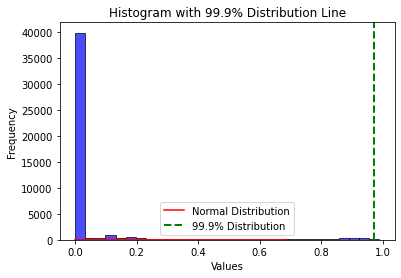

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generate sample data (replace this with your own list of values)
data = likelihoodlist

# Create histogram
plt.hist(data, bins=30,  alpha=0.7, color='blue', edgecolor='black')

# Calculate mean and standard deviation for the data
mean = np.mean(data)
std_dev = np.std(data)

# Create a range of values for x-axis based on the mean and standard deviation
x = np.linspace(0, mean + 3 * std_dev, 100)

# Plot the normal distribution curve (PDF) based on the mean and standard deviation
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', label='Normal Distribution')

# Calculate the values for the 95% distribution (replace 0.025 and 0.975 if you need a different confidence interval)

upper_bound = np.percentile(data, 99.9)

# Plot vertical lines for the 95% distribution
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='99.9% Distribution')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with 99.9% Distribution Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()

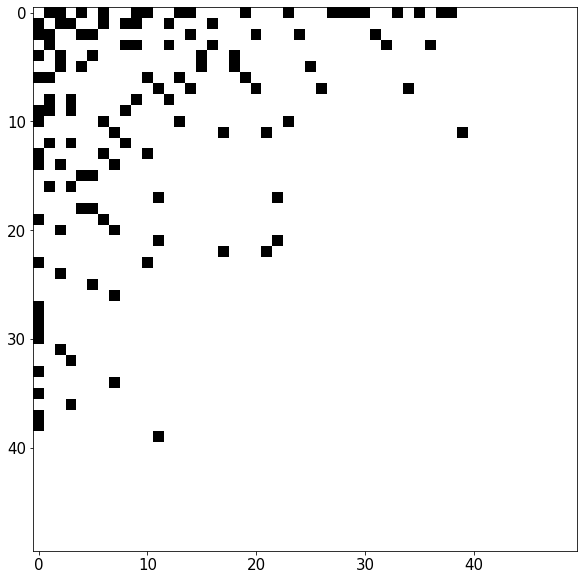

In [45]:
G=nx.from_numpy_array(np.array(simutable[8][45][15]))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

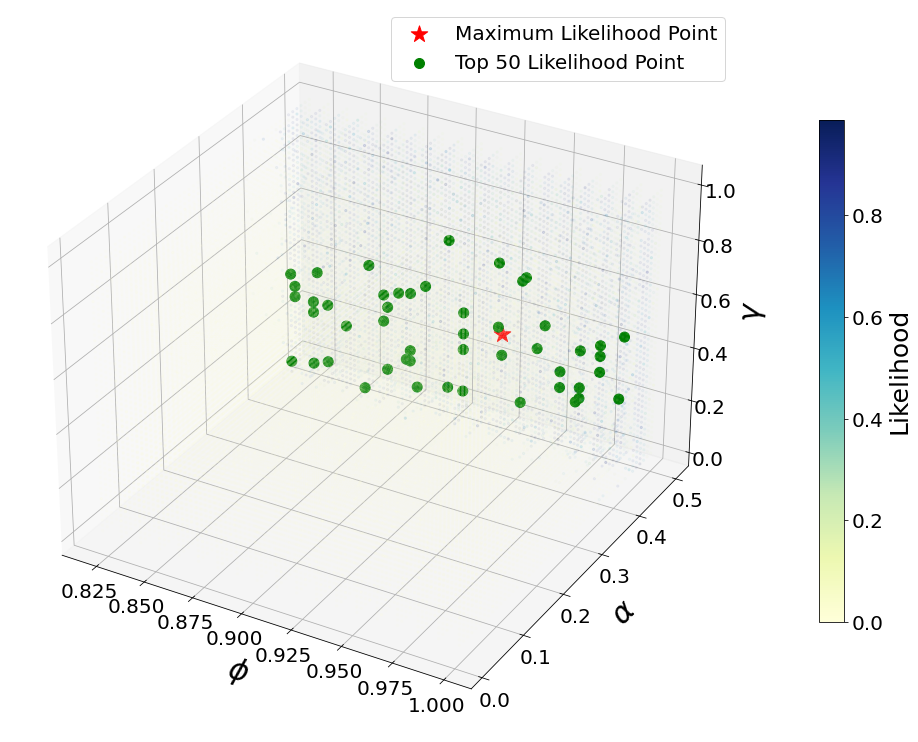

In [93]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.82, 1, 19)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Replace this line with your actual likelihoodlist
likelihoodlist = np.array(likelihoodlist)

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = likelihoodlist.flatten()

# Calculate alpha (transparency) based on likelihood values
alpha_values = 0.05 + 0.1 * (likelihood_flat - np.min(likelihood_flat)) / (np.max(likelihood_flat) - np.min(likelihood_flat))

# Scatter plot with colors and transparency
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.', alpha=alpha_values)

# Set labels for each axis

ax.set_xlabel(r'$\phi$',fontsize=30, labelpad=15)
ax.set_ylabel(r'$\alpha$',fontsize=30, labelpad=15)
ax.set_zlabel(r'$\gamma$',fontsize=30, labelpad=15)

# Set tick parameters for each axis with adjusted font size
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)



# Add colorbar with adjusted font size
cbar = fig.colorbar(p, ax=ax, cmap='YlGnBu', fraction=0.03, pad=0.1)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Likelihood', fontsize=25)

# Find indices of the largest 1 points
indices_largest_1 = np.argpartition(likelihood_flat, -1)[-1:]

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_largest_1], y_flat[indices_largest_1], z_flat[indices_largest_1],
           c='red', s=300, marker='*', label='Maximum Likelihood Point', alpha=1.0)

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -50)[-50:]

indices_low= np.setdiff1d(np.argpartition(likelihood_flat, -50)[-50:],indices_largest_1)

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_low], y_flat[indices_low], z_flat[indices_low],
           c='green', s=100, marker='o', label='Top 50 Likelihood Point', alpha=1.0)


# Show the legend
ax.legend(fontsize=20)
#fig.text(0.5, 0.15, 'Simulated Networks of Size 50', ha='center', fontsize=40)
plt.savefig('figure4_1.pdf', format='pdf')

plt.show()

In [27]:
np.mean(x_flat[indices_largest])

0.9236

In [28]:
np.mean(y_flat[indices_largest])

0.46140000000000003

In [29]:
np.mean(z_flat[indices_largest])

0.654

In [30]:
np.std(x_flat[indices_largest])

0.05860921429263491

In [31]:
np.std(y_flat[indices_largest])

0.00721387551874858

In [32]:
np.std(z_flat[indices_largest])

0.24219826588974583

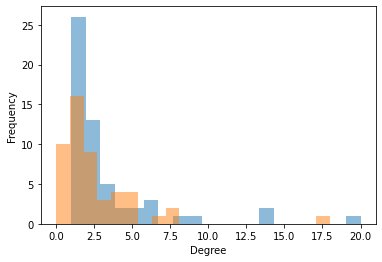

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = [degree for node, degree in G1.degree()]
degree_dist_G2 = [degree for node, degree in G2.degree()]

# Plot degree distributions
plt.hist(degree_dist_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(degree_dist_G2, bins=20, alpha=0.5, label='Network Optimization')

#plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
#plt.legend()
plt.savefig('figure5_50_1.pdf', format='pdf')
plt.show()

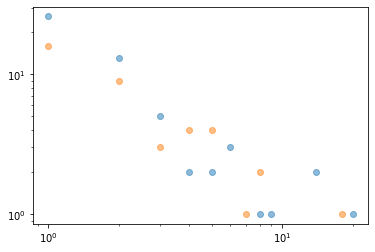

In [94]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 =  G_empirical  # Replace this with your actual data for the first network
G2 = G   # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = dict(Counter(dict(G1.degree()).values()))
degree_dist_G2 = dict(Counter(dict(G2.degree()).values()))

# Create scatter plot
plt.scatter(degree_dist_G1.keys(), degree_dist_G1.values(), alpha=0.5, label='Network Empirical')
plt.scatter(degree_dist_G2.keys(), degree_dist_G2.values(), alpha=0.5, label='Network Optimization')


plt.xscale('log')
plt.yscale('log')

#plt.title('Scatter Plot of Degree Frequencies')
#plt.xlabel('Log Degree')
#plt.ylabel('Log Frequency')
#plt.legend()
plt.savefig('figure5_50_2.pdf', format='pdf')
plt.show()

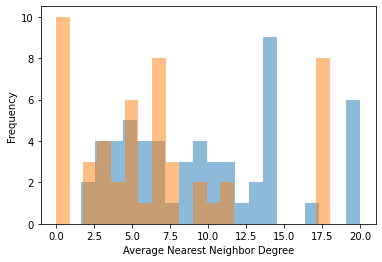

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate average nearest neighbor degrees
avg_nn_degree_G1 = list(nx.average_neighbor_degree(G1).values())
avg_nn_degree_G2 = list(nx.average_neighbor_degree(G2).values())

# Plot histograms
plt.hist(avg_nn_degree_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(avg_nn_degree_G2, bins=20, alpha=0.5, label='Network Optimization')

#plt.title('Average Nearest Neighbor Degree Distribution')
plt.xlabel('Average Nearest Neighbor Degree')
plt.ylabel('Frequency')
#plt.legend()
plt.savefig('figure5_50_3.pdf', format='pdf')
plt.show()

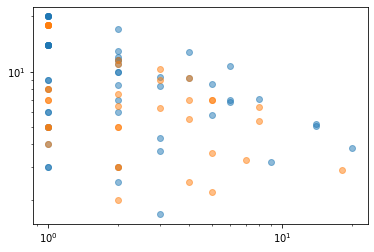

In [95]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate degrees and average nearest neighbor degrees
degrees_G1 = dict(G1.degree())
avg_nn_degree_G1 = nx.average_neighbor_degree(G1)

degrees_G2 = dict(G2.degree())
avg_nn_degree_G2 = nx.average_neighbor_degree(G2)

# Extract values for scatter plot
x_values_G1 = list(degrees_G1.values())
y_values_G1 = list(avg_nn_degree_G1.values())

x_values_G2 = list(degrees_G2.values())
y_values_G2 = list(avg_nn_degree_G2.values())

# Create scatter plot
plt.scatter(x_values_G1, y_values_G1, alpha=0.5, label='Network Empirical')
plt.scatter(x_values_G2, y_values_G2, alpha=0.5, label='Network Optimization')

plt.xscale('log')
plt.yscale('log')

#plt.title('Scatter Plot of Degree vs. Average Nearest Neighbor Degrees')
#plt.xlabel('Log Degree')
#plt.ylabel('Log Average Nearest Neighbor Degree')
#plt.legend()
plt.savefig('figure5_50_4.pdf', format='pdf')
plt.show()

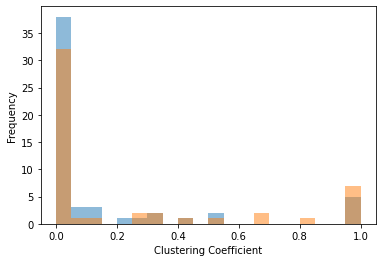

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate clustering coefficients
clustering_G1 = list(nx.clustering(G1).values())
clustering_G2 = list(nx.clustering(G2).values())

# Plot histograms
plt.hist(clustering_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(clustering_G2, bins=20, alpha=0.5, label='Network Optimization')

#plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
#plt.legend()
plt.savefig('figure5_50_5.pdf', format='pdf')
plt.show()


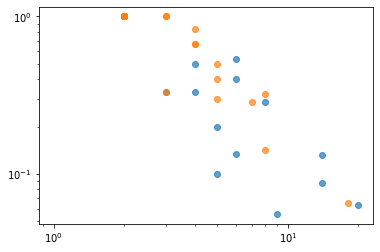

In [96]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate clustering coefficients and node degrees
clustering_G1 = nx.clustering(G1)
clustering_G2 = nx.clustering(G2)

degrees_G1 = dict(G1.degree())
degrees_G2 = dict(G2.degree())

# Extract values for plotting
nodes_G1, coefficients_G1 = zip(*clustering_G1.items())
nodes_G2, coefficients_G2 = zip(*clustering_G2.items())

degrees_values_G1 = [degrees_G1[node] for node in nodes_G1]
degrees_values_G2 = [degrees_G2[node] for node in nodes_G2]

# Plot scatter plot with x-axis as node degree
plt.scatter(degrees_values_G1, coefficients_G1, label='Network Empirical', alpha=0.7)
plt.scatter(degrees_values_G2, coefficients_G2, label='Network Optimization', alpha=0.7)

plt.xscale('log')
plt.yscale('log')


#plt.title('Clustering Coefficient vs Node Degree Scatter Plot')
#plt.xlabel('Log Node Degree')
#plt.ylabel('Log Clustering Coefficient')
plt.savefig('figure5_50_6.pdf', format='pdf')
#plt.legend()
plt.show()